In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import re
sns.set_theme(style="whitegrid")

In [2]:
csv_files = ['csv/acc-s24.628.csv', 'csv/acc-s9.622.csv', 'csv/acc-s38.348.csv']
angular_sizes = ['1.1e-4', '1.8e-4', '5e-5']

In [3]:
b = re.compile(r's(\d+.\d+).csv')

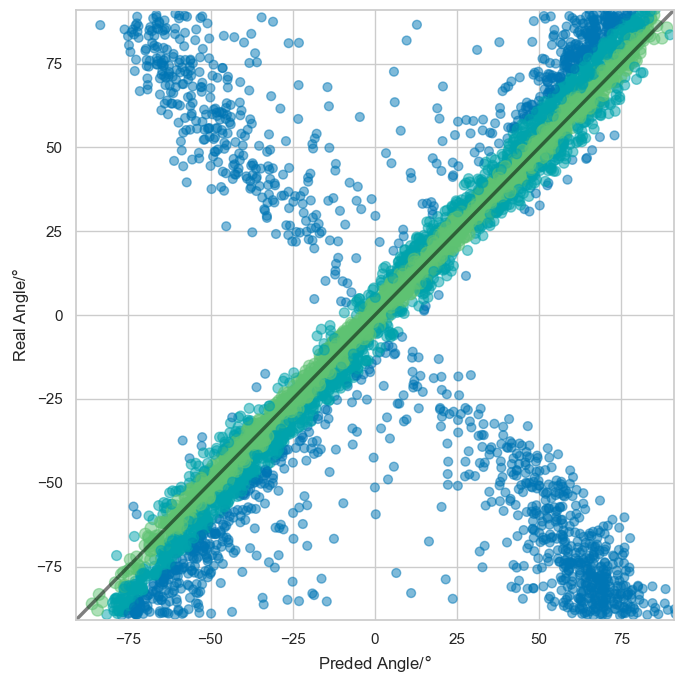

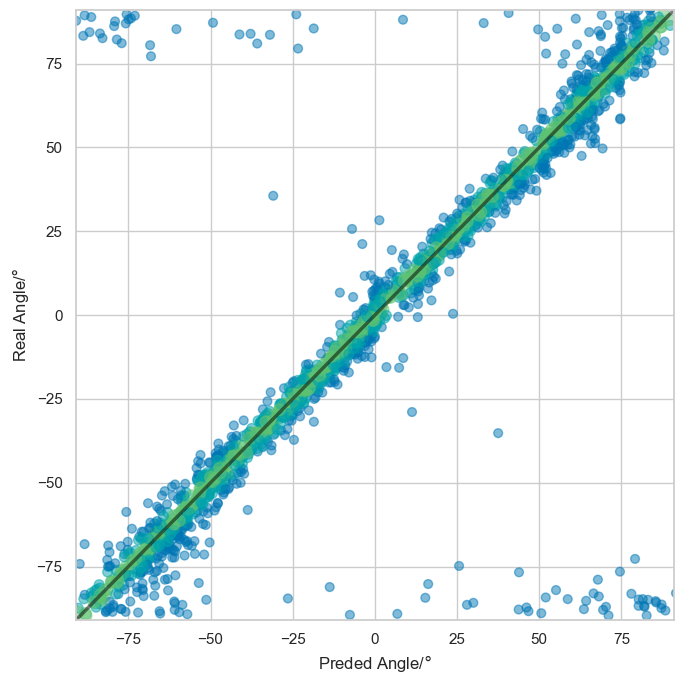

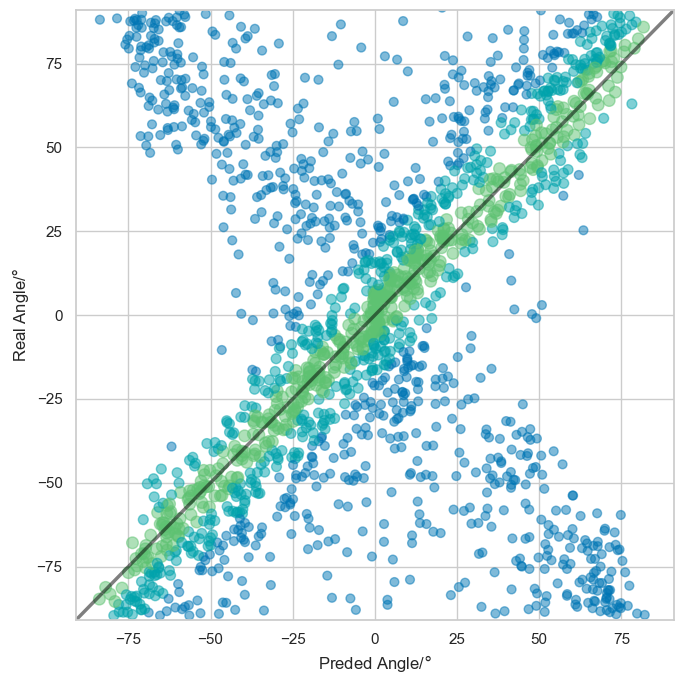

In [4]:
for index, csv_file in enumerate(csv_files):
    mae = float(re.findall(b, csv_file)[0])
    try:
        df = pd.read_csv(csv_file)
        df.drop(['Unnamed: 0'], axis=1, inplace=True)
        x = df.Pred
        y = df.Real
    except KeyError as e:
        df = pd.read_csv(csv_file)
        x = df.Pred_inc
        y = df.Real_inc
    df.head()
    col =[]
    sizes = []
    for i in range(0, len(x)):
        distance_to_line = abs(x[i] - y[i])
        if distance_to_line < mae / 5: 
            col.append('#5EC272')
            sizes.append(70)
        elif distance_to_line < mae / 2:
            col.append('#00A3AC')
            sizes.append(50)
        else:
            col.append('#0076B5')
            sizes.append(40)
        
    plt.figure(figsize=(7, 7))
    # Create a line plot of the data points and the linear regression line
    plt.scatter(x, y, alpha=0.5, s=sizes, color=col)
    plt.plot([-91, 91], [-91, 91], linewidth=2.5, color='black', alpha=0.5)

    # Label the axes and title the plot
    plt.xlabel("Preded Angle/$\degree$")
    plt.ylabel("Real Angle/$\degree$")
    plt.xlim(-91, 91)
    plt.ylim(-91, 91)
    plt.tight_layout()
    plt.savefig(f'images/fit_{mae}_{angular_sizes[index]}.png', dpi=600)
    plt.savefig(f'images/fit_{mae}_{angular_sizes[index]}.pdf')
    plt.show()

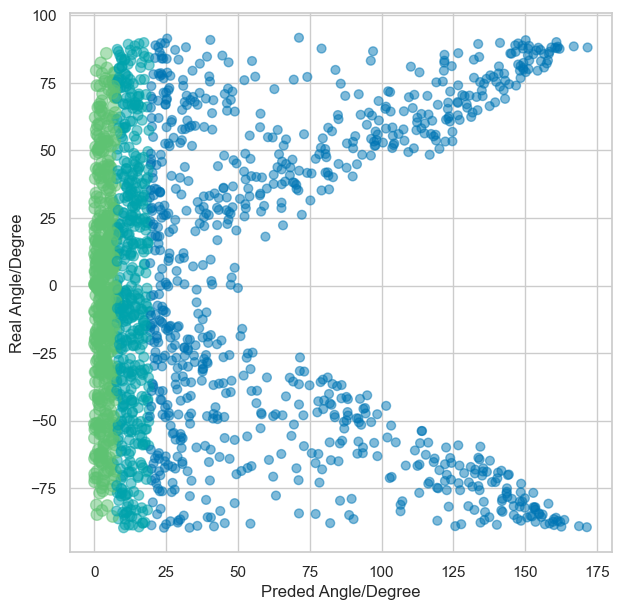

In [5]:
plt.figure(figsize=(7, 7))
# Create a line plot of the data points and the linear regression line
plt.scatter(np.abs(x - y), y, alpha=0.5, s=sizes, color=col)
# plt.plot([-91, 91], [-91, 91], 'red', linewidth=2.5)

# Label the axes and title the plot
plt.xlabel("Preded Angle/Degree")
plt.ylabel("Real Angle/Degree")
# plt.xlim(-91, 91)
# plt.ylim(-91, 91)
# plt.title("Linear Regression")
# plt.savefig('images/fit2.png', dpi=600)

# Show the plot
plt.show()